## ML - Task1- Measures of Descriptive statistics-Central Tendency, spread @channel  

### You are given house_price.csv which contains property prices in the city of Bangalore. You need to examine price per square feet do the following:
### Detect the outliers and remove it using:
* Mean Function
* Percentile method
* IQR(Inter quartile range method)
* Normal distribution
* Zscore method
### Also, plot the box plot(for all the numerical columns), histplot(to check the normality of the column(price per sqft column))

### Check the correlation between all the numerical columns and plot heatmap.
### Scatter plot between the variables to check the correlation between them.

# Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew,kurtosis

# Read the Data

In [2]:
df = pd.read_csv('house_price.csv')
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


# Data Analysis

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [4]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.0,4.0,231.0,5,6689
13196,other,4 BHK,3600.0,5.0,400.0,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.0,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.0,4,10407
13199,Doddathoguru,1 BHK,550.0,1.0,17.0,1,3090


In [6]:
df.shape # The dataset has 13200 rows and 7 columns

(13200, 7)

In [7]:
df.info() # includes 2 categorical columns and 5 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [8]:
df.isnull().sum() # No Null values

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [9]:
df.duplicated().sum() # 1049 Duplicate Values

1049

In [10]:
num_col = df.select_dtypes(include=['number']).columns
print("numerical columns = ",num_col)
obj_col = df.select_dtypes(include=['object']).columns
print("categorical columns",obj_col)

numerical columns =  Index(['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft'], dtype='object')
categorical columns Index(['location', 'size'], dtype='object')


In [12]:
for col in obj_col:  # Unique values in categorical columns
    print(f"unique values in {col}")
    print(df[col].unique())
    print('number of unique values : ',len(df[col].unique()))
    print('===========================================================')

unique values in location
['Electronic City Phase II' 'Chikka Tirupathi' 'Uttarahalli'
 'Lingadheeranahalli' 'Kothanur' 'Whitefield' 'Old Airport Road'
 'Rajaji Nagar' 'Marathahalli' 'other' '7th Phase JP Nagar' 'Gottigere'
 'Sarjapur' 'Mysore Road' 'Bisuvanahalli' 'Raja Rajeshwari Nagar'
 'Kengeri' 'Binny Pete' 'Thanisandra' 'Bellandur' 'Electronic City'
 'Ramagondanahalli' 'Yelahanka' 'Hebbal' 'Kasturi Nagar' 'Kanakpura Road'
 'Electronics City Phase 1' 'Kundalahalli' 'Chikkalasandra'
 'Murugeshpalya' 'Sarjapur  Road' 'HSR Layout' 'Doddathoguru' 'KR Puram'
 'Bhoganhalli' 'Lakshminarayana Pura' 'Begur Road' 'Varthur'
 'Bommanahalli' 'Gunjur' 'Devarachikkanahalli' 'Hegde Nagar'
 'Haralur Road' 'Hennur Road' 'Kothannur' 'Kalena Agrahara'
 'Kaval Byrasandra' 'ISRO Layout' 'Garudachar Palya' 'EPIP Zone'
 'Dasanapura' 'Kasavanhalli' 'Sanjay nagar' 'Domlur'
 'Sarjapura - Attibele Road' 'Yeshwanthpur' 'Chandapura' 'Nagarbhavi'
 'Devanahalli' 'Ramamurthy Nagar' 'Malleshwaram' 'Akshaya Nagar'


<Axes: >

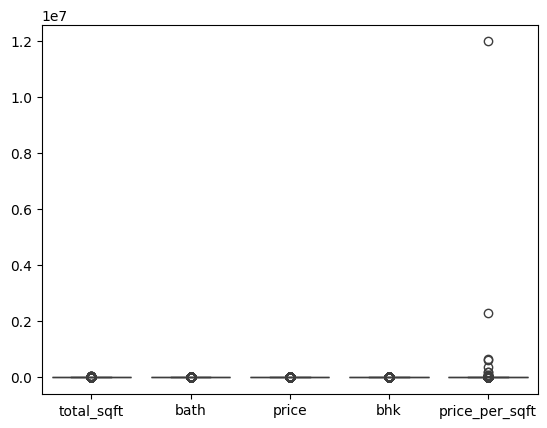

In [15]:
sns.boxplot(df[num_col]) # Box Plot for all numerical columns

## Box Plot Shows outliers in all columns

<Axes: xlabel='price_per_sqft', ylabel='Count'>

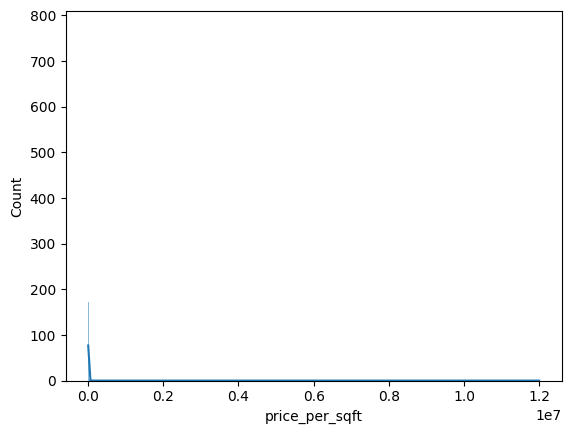

In [16]:
sns.histplot(df['price_per_sqft'],kde=True)

In [23]:
df['price_per_sqft'].skew() # higly right skewed

103.90203228991889

In [24]:
kurtosis(df['price_per_sqft'],fisher=False) # Leptokurtic

11134.230839805388

### Rigth skewed histplot

In [18]:
df['price_per_sqft'].describe()

count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

### high diffeerence between the 75% and max value indicating outliers

<Axes: >

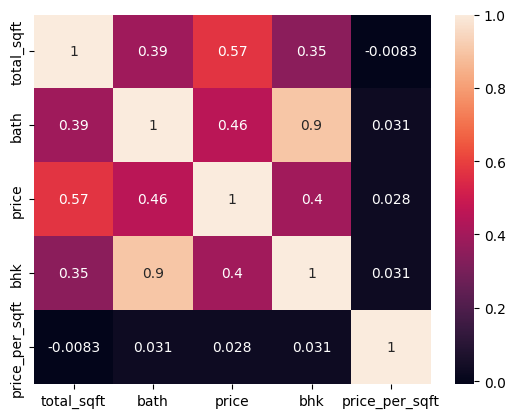

In [19]:
sns.heatmap(df[num_col].corr(),annot=True) # heatmap for the numerical columns

### input features bath and bhk have high correlation

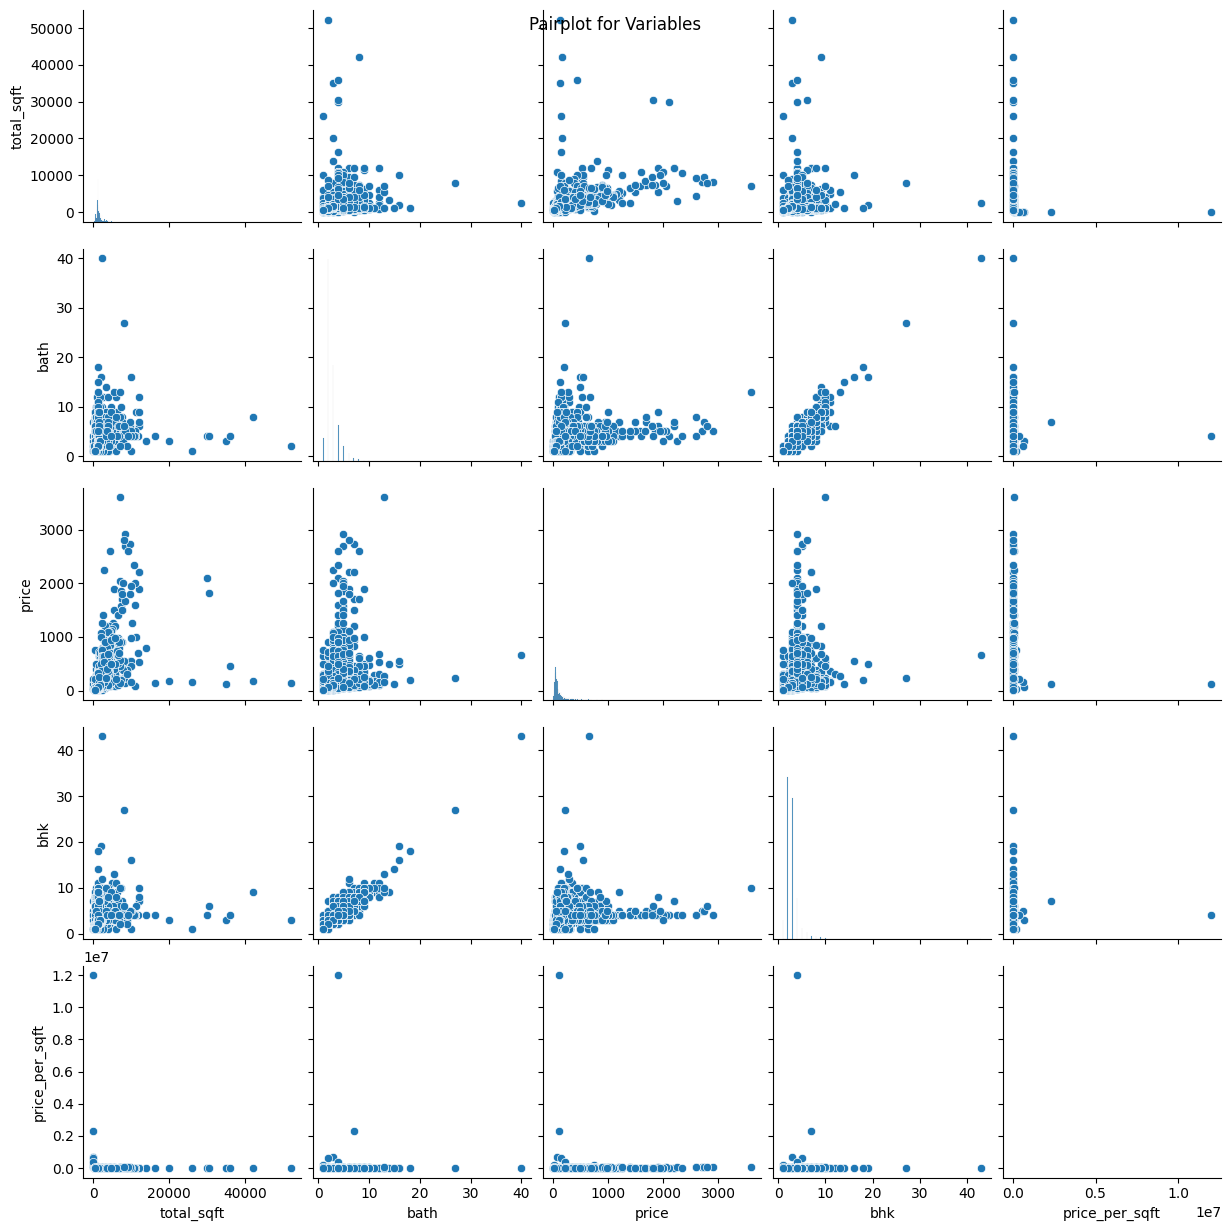

In [20]:
sns.pairplot(df[num_col])
plt.suptitle("Pairplot for Variables")
plt.show()

# Data Preprocessing

In [22]:
df = df.drop_duplicates() # Removing the duplicates
df.shape

(12151, 7)

In [26]:
df['price_per_sqft'] = np.log(df['price_per_sqft']) # to minimize the skew
df['price_per_sqft'].skew()

1.4004115521345566

In [27]:
df['price_per_sqft'] = np.log(df['price_per_sqft']) # to minimize the skew
df['price_per_sqft'].skew()

0.8401067540531205

<Axes: xlabel='price_per_sqft', ylabel='Count'>

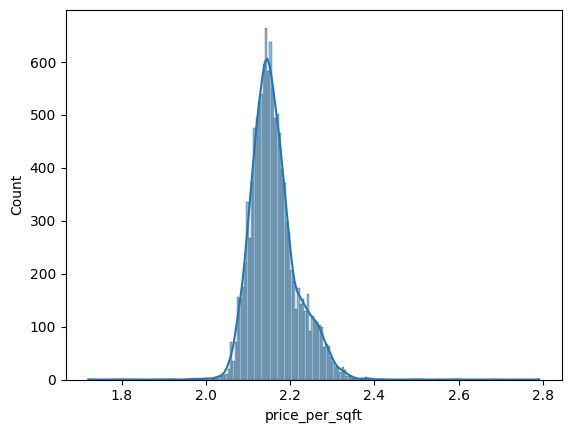

In [28]:
sns.histplot(df['price_per_sqft'],kde=True)

# Removing Outliers Using Mean Function

In [29]:
mean = df['price_per_sqft'].mean()
print('mean : ',mean)
std = df['price_per_sqft'].std()
print('standard deviation : ',std)
threshold = 2*std
print('threshold :',threshold)

mean :  2.1610239786917886
standard deviation :  0.05534740376656903
threshold : 0.11069480753313805


In [30]:
outliers_mean = df[(df['price_per_sqft'] > mean + threshold) | (df['price_per_sqft'] < mean - threshold)]
cleaned_df_mean = df.drop(outliers_mean.index)

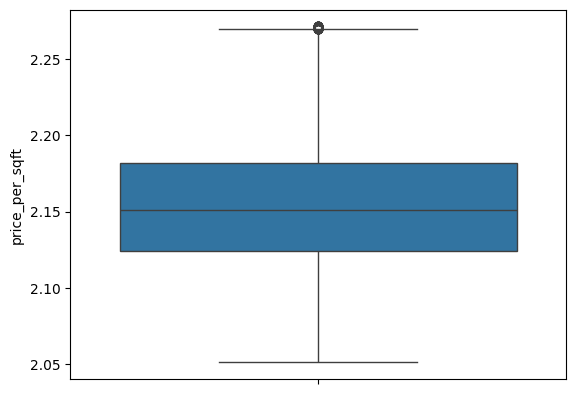

In [31]:
sns.boxplot(cleaned_df_mean['price_per_sqft'])
plt.show()

# Removing Outliers Using Percentile Method

In [32]:
lower_percentile = df['price_per_sqft'].quantile(0.05)
upper_percentile = df['price_per_sqft'].quantile(0.95)
outliers_percentile = df[(df['price_per_sqft']<lower_percentile) | (df['price_per_sqft']>upper_percentile)]
cleaned_df_percentile = df.drop(outliers_percentile.index)

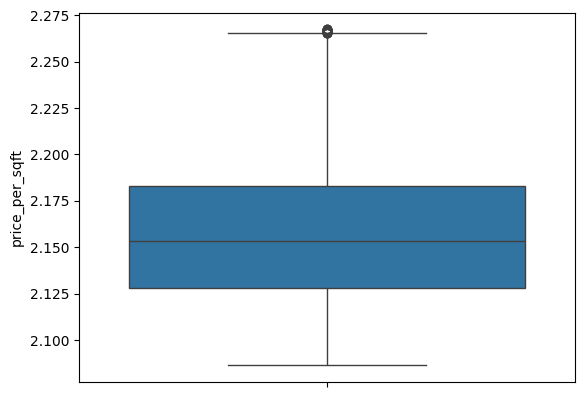

In [33]:
sns.boxplot(cleaned_df_percentile['price_per_sqft'])
plt.show()

# Removing Outliers Using IQR

In [34]:
q1 = df['price_per_sqft'].quantile(0.25)
print('q1 :',q1)
q3 = df['price_per_sqft'].quantile(0.75)
print('q3 :',q3)
IQR = q3 - q1
print('IQR :',IQR)
lower_whisker = q1-1.5*IQR
print('Lower_whisker :',lower_whisker)
upper_whisker = q3+1.5*IQR
print('Upper_whisker :',upper_whisker)

q1 : 2.124553176036052
q3 : 2.1880094394632317
IQR : 0.06345626342717958
Lower_whisker : 2.0293687808952825
Upper_whisker : 2.283193834604001


In [35]:
outliers_IQR = df[(df['price_per_sqft']<lower_whisker) | (df['price_per_sqft']>upper_whisker)]
cleaned_df_IQR = df.drop(outliers_IQR.index)

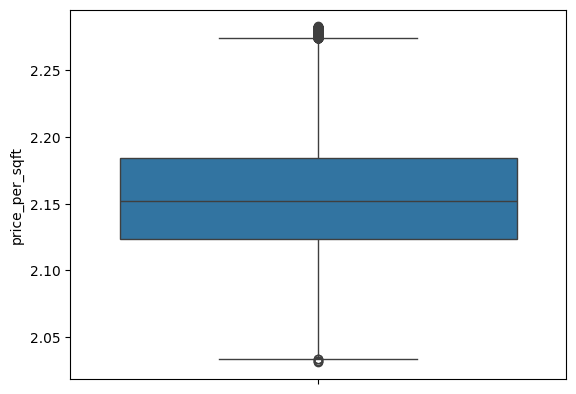

In [36]:
sns.boxplot(cleaned_df_IQR['price_per_sqft'])
plt.show()

# Removing Outliers Using Normal Distribution

In [37]:
threshold_nd = 3*std
print(threshold_nd)

0.1660422112997071


In [38]:
outliers_nd = df[(df['price_per_sqft'] > mean + threshold_nd) | (df['price_per_sqft'] < mean - threshold_nd)]
cleaned_df_nd = df.drop(outliers_nd.index)

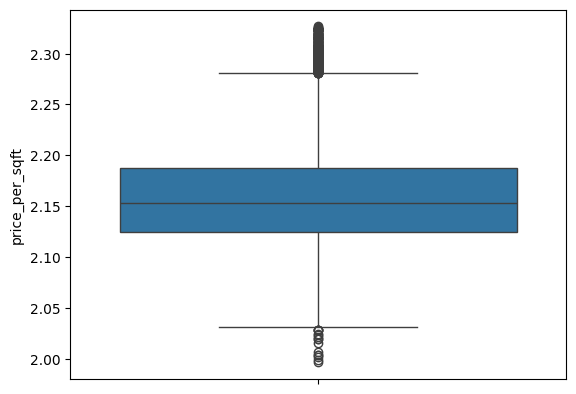

In [39]:
sns.boxplot(cleaned_df_nd['price_per_sqft'])
plt.show()

# Removing Outliers Using Z-Score

In [40]:
df['Z_Score'] = (df.price_per_sqft-mean)/std
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft,Z_Score
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2.106061,-0.993049
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,2.132635,-0.512928
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,2.124359,-0.662451
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,2.167857,0.123460
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2.122821,-0.690237
...,...,...,...,...,...,...,...,...
13194,Green Glen Layout,3 BHK,1715.0,3.0,112.00,3,2.172950,0.215482
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,2.175685,0.264897
13196,other,4 BHK,3600.0,5.0,400.00,4,2.231700,1.276956
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,2.147977,-0.235735


In [42]:
outliers_zscore = df[(df.Z_Score<-3) | (df.Z_Score>3)]
cleaned_df_zscore = df.drop(outliers_zscore.index)

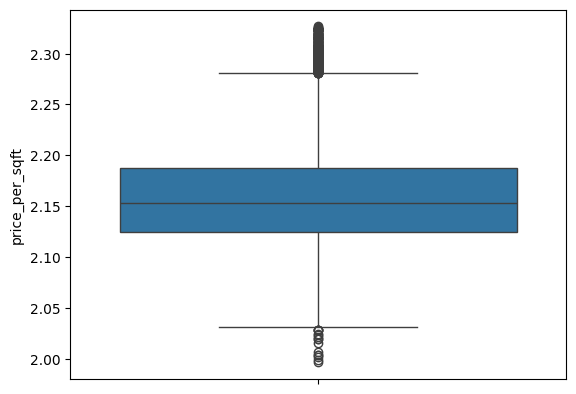

In [43]:
sns.boxplot(cleaned_df_zscore['price_per_sqft'])
plt.show()